In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                             confusion_matrix, roc_curve, auc)
from sklearn.preprocessing import StandardScaler

## 2. Загрузка датасета: Breast Cancer

In [13]:
# Загрузка данных
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

print(f"Размер данных: {X.shape[0]} пациентов, {X.shape[1]} признаков")
print(f"Класс 0 (malignant): {(y == 0).sum()} | Класс 1 (benign): {(y == 1).sum()}")

Размер данных: 569 пациентов, 30 признаков
Класс 0 (malignant): 212 | Класс 1 (benign): 357


In [14]:
df = pd.DataFrame(X, columns=cancer.feature_names)
df['target'] = y

df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


## 3. Train/Test Split и масштабирование

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Train: {X_train_scaled.shape[0]} | Test: {X_test_scaled.shape[0]}")

Train: 455 | Test: 114


## 4. Реализация: Класс MyLogisticRegression

In [23]:
class MyLogisticRegression:
    """
    Логистическая регрессия с градиентным спуском
    """
    
    def __init__(self, learning_rate=0.01, n_iterations=2000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.w0 = None 
        self.w1 = None
        self.loss_history = []
        
    def _sigmoid(self, z):
        """Sigmoid функция"""
        return 1 / (1 + np.exp(-z))
    
    def _binary_cross_entropy(self, y_true, y_pred):
        """Binary Cross-Entropy Loss"""
        epsilon = 1e-15
        y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
        return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
    
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.w0 = 0
        self.w1 = np.zeros(n_features)
        
        for i in range(self.n_iterations):
            z = self.w0 + np.dot(X, self.w1)
            y_pred = self._sigmoid(z)
            
            loss = self._binary_cross_entropy(y, y_pred)
            self.loss_history.append(loss)
            
            dw0 = np.mean(y_pred - y)
            dw1 = np.dot(X.T, (y_pred - y)) / n_samples
            
            self.w0 = self.w0 - self.learning_rate * dw0
            self.w1 = self.w1 - self.learning_rate * dw1
            
        return self
    
    def predict_proba(self, X):
        z = self.w0 + np.dot(X, self.w1)
        return self._sigmoid(z)
    
    def predict(self, X, threshold=0.5):
        return (self.predict_proba(X) >= threshold).astype(int)

## 5. Обучение модели

In [24]:
my_model = MyLogisticRegression()
my_model.fit(X_train_scaled, y_train)

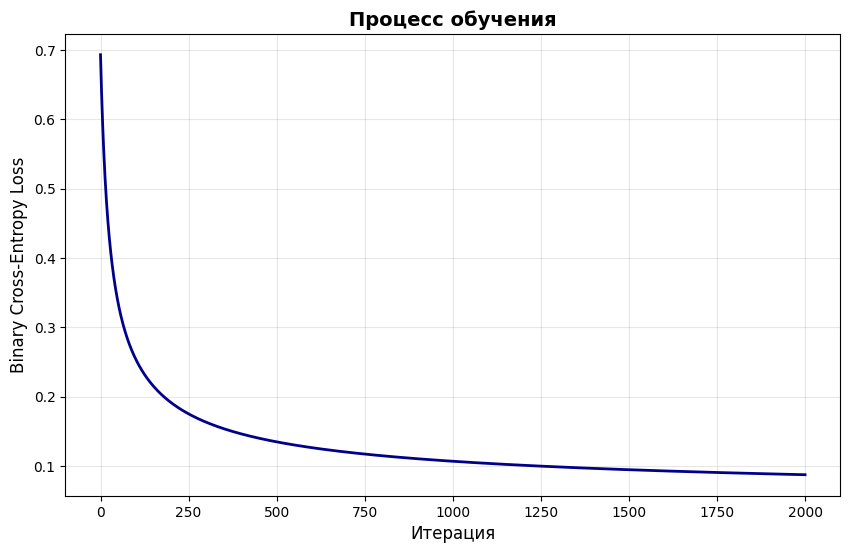

Начальная ошибка: 0.6931
Финальная ошибка: 0.0877


In [25]:
# Визуализация процесса обучения
plt.figure(figsize=(10, 6))
plt.plot(my_model.loss_history, color='darkblue', linewidth=2)
plt.xlabel('Итерация', fontsize=12)
plt.ylabel('Binary Cross-Entropy Loss', fontsize=12)
plt.title('Процесс обучения', fontsize=14, fontweight='bold')
plt.grid(alpha=0.3)
plt.show()

print(f"Начальная ошибка: {my_model.loss_history[0]:.4f}")
print(f"Финальная ошибка: {my_model.loss_history[-1]:.4f}")

## 6. Предсказания и метрики

In [26]:
# Предсказания
y_pred = my_model.predict(X_test_scaled)

# Метрики
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy:  {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall:    {rec:.4f}")
print(f"F1-Score:  {f1:.4f}")

Accuracy:  0.9912
Precision: 0.9861
Recall:    1.0000
F1-Score:  0.9930


## 7. Confusion Matrix

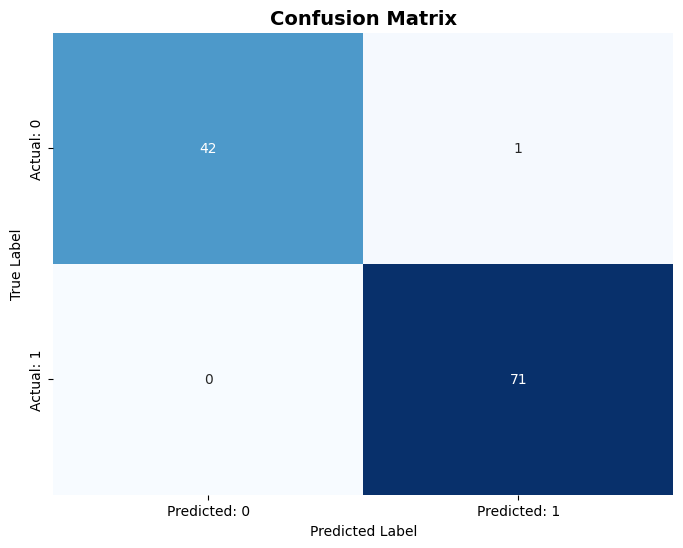


True Negative:  42
False Positive: 1
False Negative: 0
True Positive:  71


In [27]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted: 0', 'Predicted: 1'],
            yticklabels=['Actual: 0', 'Actual: 1'])
plt.title('Confusion Matrix', fontsize=14, fontweight='bold')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Ручной расчёт метрик из Confusion Matrix
tn, fp, fn, tp = cm.ravel()
print(f"\nTrue Negative:  {tn}")
print(f"False Positive: {fp}")
print(f"False Negative: {fn}")
print(f"True Positive:  {tp}")

## 8. ROC Curve и AUC

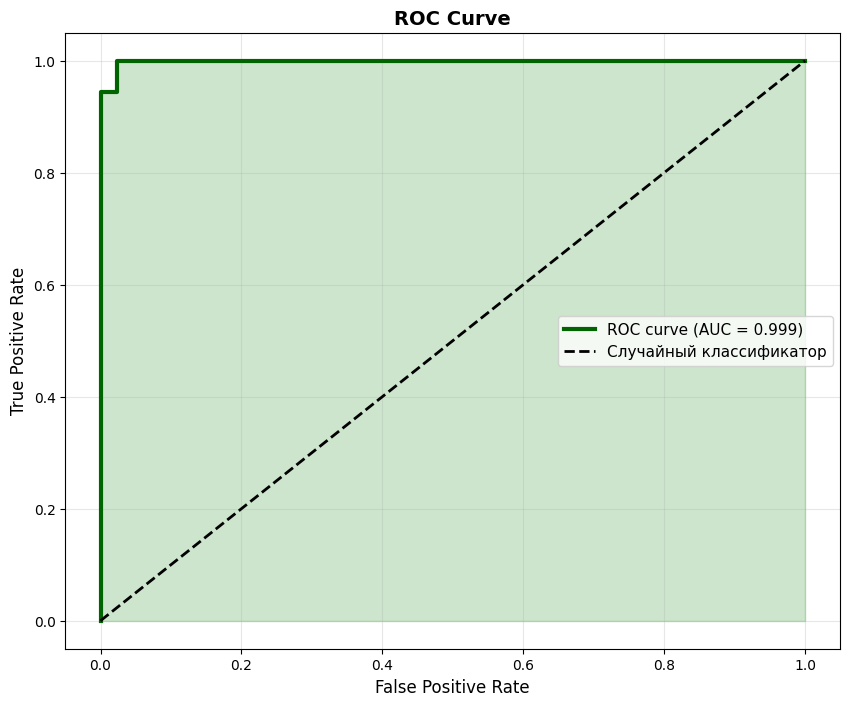

AUC Score: 0.9987


In [28]:
# Вероятности для ROC
y_proba = my_model.predict_proba(X_test_scaled)

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, linewidth=3, label=f'ROC curve (AUC = {roc_auc:.3f})', color='darkgreen')
plt.plot([0, 1], [0, 1], 'k--', linewidth=2, label='Случайный классификатор')
plt.fill_between(fpr, 0, tpr, alpha=0.2, color='green')

plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curve', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(alpha=0.3)
plt.show()

print(f"AUC Score: {roc_auc:.4f}")

## 9. Выбор оптимального Threshold

In [29]:
# Тестируем разные пороги
test_thresholds = [0.3, 0.5, 0.7, 0.9]

print(f"{'Threshold':<12} {'Accuracy':<12} {'Precision':<12} {'Recall':<12} {'F1-Score':<12}")
print("-" * 60)

for threshold in test_thresholds:
    y_pred_thresh = my_model.predict(X_test_scaled, threshold=threshold)
    
    acc_t = accuracy_score(y_test, y_pred_thresh)
    prec_t = precision_score(y_test, y_pred_thresh)
    rec_t = recall_score(y_test, y_pred_thresh)
    f1_t = f1_score(y_test, y_pred_thresh)
    
    print(f"{threshold:<12.1f} {acc_t:<12.4f} {prec_t:<12.4f} {rec_t:<12.4f} {f1_t:<12.4f}")

Threshold    Accuracy     Precision    Recall       F1-Score    
------------------------------------------------------------
0.3          0.9737       0.9595       1.0000       0.9793      
0.5          0.9912       0.9861       1.0000       0.9930      
0.7          0.9561       0.9853       0.9437       0.9640      
0.9          0.9123       1.0000       0.8592       0.9242      


## 10. Влияние Learning Rate

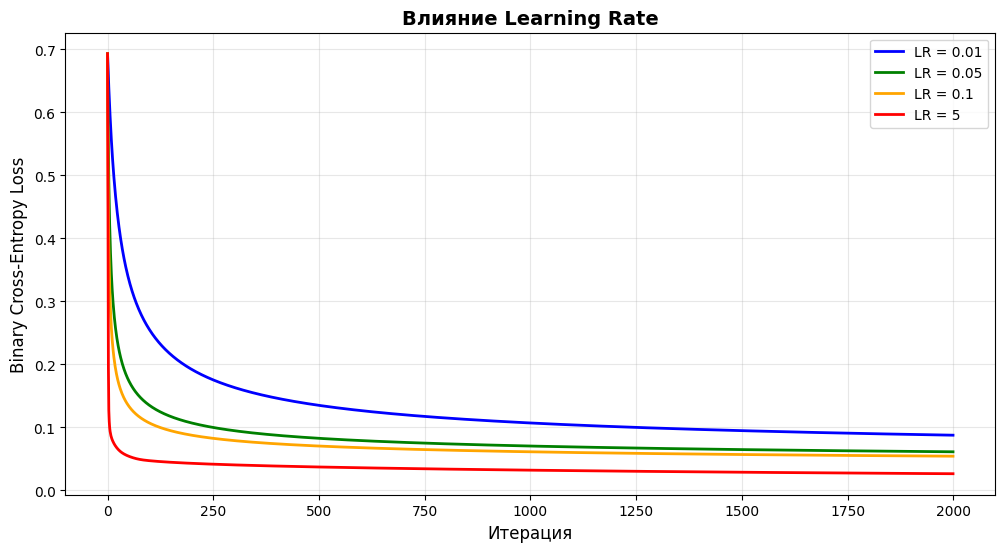

In [ ]:
learning_rates = [0.01, 0.05, 0.1, 0.5]
colors = ['blue', 'green', 'orange', 'red']

plt.figure(figsize=(12, 6))

for lr, color in zip(learning_rates, colors):
    model_temp = MyLogisticRegression(learning_rate=lr, n_iterations=2000)
    model_temp.fit(X_train_scaled, y_train)
    plt.plot(model_temp.loss_history, color=color, linewidth=2, label=f'LR = {lr}')

plt.xlabel('Итерация', fontsize=12)
plt.ylabel('Binary Cross-Entropy Loss', fontsize=12)
plt.title('Влияние Learning Rate', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

---

# Задание

1. Попробовать другой датасет
2. Попробовать разные `learning_rate` (0.001, 0.01, 0.1, 1.0)
3. Найти оптимальный threshold по F1-Score